# Bike Sharing System - Multiple Linear Regression


<hr>

## Business Understanding

A <b>Bike-Sharing System</b> is a consumer service which provides bikes for shared use to individuals for a price or free on a short term basis. Bike Share systems provide people the facility to borrow a bike from a Computer - Controlled Parking Dock where the user makes the payment and the system unlocks it. This bike can then be returned after use to another dock of the same system.

A US Bike-Sharing provider <b>BoomBikes</b> has recently hit by the Pandemic and suffered hiccup in their revenues. The company is finding it hard to sustain in the current market scenario. So, it has decided to accelerate its revenue with a mindful business plan as soon as the lockdown ends, and the economy restores to a healthy state. 

Accordingly, BoomBikes tries to understand the demand for shared bikes among the people after the pandemic ends across the nation. They have planned to prepare themselves to cater to the people's needs once the situation gets better and stand exceptional from other service providers and make huge profits.

I work for a Consulting Company for which the Boom Bikes have given contract to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

<hr>

## Problem Statement

I work for a Consulting Company for which the Boom Bikes firm have given contract to understand the factors on which the demand for these shared bikes depends. The Company is provided with various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

With the provided data, the company is required to model the demand for shared bikes with the available independent variables. Therefore, derive the following from it:
 - #### Which variables are significant in predicting the demand for shared bikes.
 - #### How well those variables describe the bike demands

We use Multiple Linear Regression for solving the Problem Statement which involves the following steps:
- Reading and Understanding the Data.
- Data Visualization.
- Data Preparation
- Building Model.
- Making Predictions

<hr>

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy Libraries
import numpy as np
import pandas as pd

In [3]:
# Read the CSV file into Data Frame
bike_sharing = pd.read_csv("day.csv")

In [4]:
# Display the top 5 rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Shape of the Data Frame
bike_sharing.shape

(730, 16)

In [6]:
# Display the structure of the Data Frame
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Describe Statistical Parameters of each Numerical Column or Variable of Data Frame
bike_sharing.describe().round(decimals = 2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [8]:
# Number of Distinct Values of a variable
bike_sharing.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

#### Obseravtions:
- There are 730 rows and 16 columns.
- There are no missing values.
- Every column is having more than one unique value.
- The categorical type variables are: `season, yr, mnth, holiday, weekday, weathersit`.
- All other variables, categorical and columns instant and dteday, all other variables are continuous numerical variables.
- The Columns `instant` and `dteday` may not be useful because they contain only distinct values.
- `casual` and `registered` sum to value in `cnt` variable and the company is interested in overall user demand and not specific.

In [9]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bike_sharing.drop(columns =columns_to_drop , axis=1, inplace=True)

In [10]:
# Display DataFrame to verify the column drop
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Describing the Statistical Terms of Columns of Updated Data Frame
bike_sharing.describe().round(decimals=2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,4508.01
std,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,1936.01
min,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,22.00
25%,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,3169.75
50%,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,4548.50
75%,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,5966.00
max,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,8714.00


<hr>

## Step 2: Data Visualization

Data Visualisation is the important step in understanding data.
It is useful in:
- To catch the undesired Multi Collinearity among Independant Variables.
- To identify the association of Predictors with Outcome variable

In [12]:
# Importing Matplotlib and SeaBorn to Plot Pair Plots and HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

#### Pair Plot To Understand Multi-Collinearity

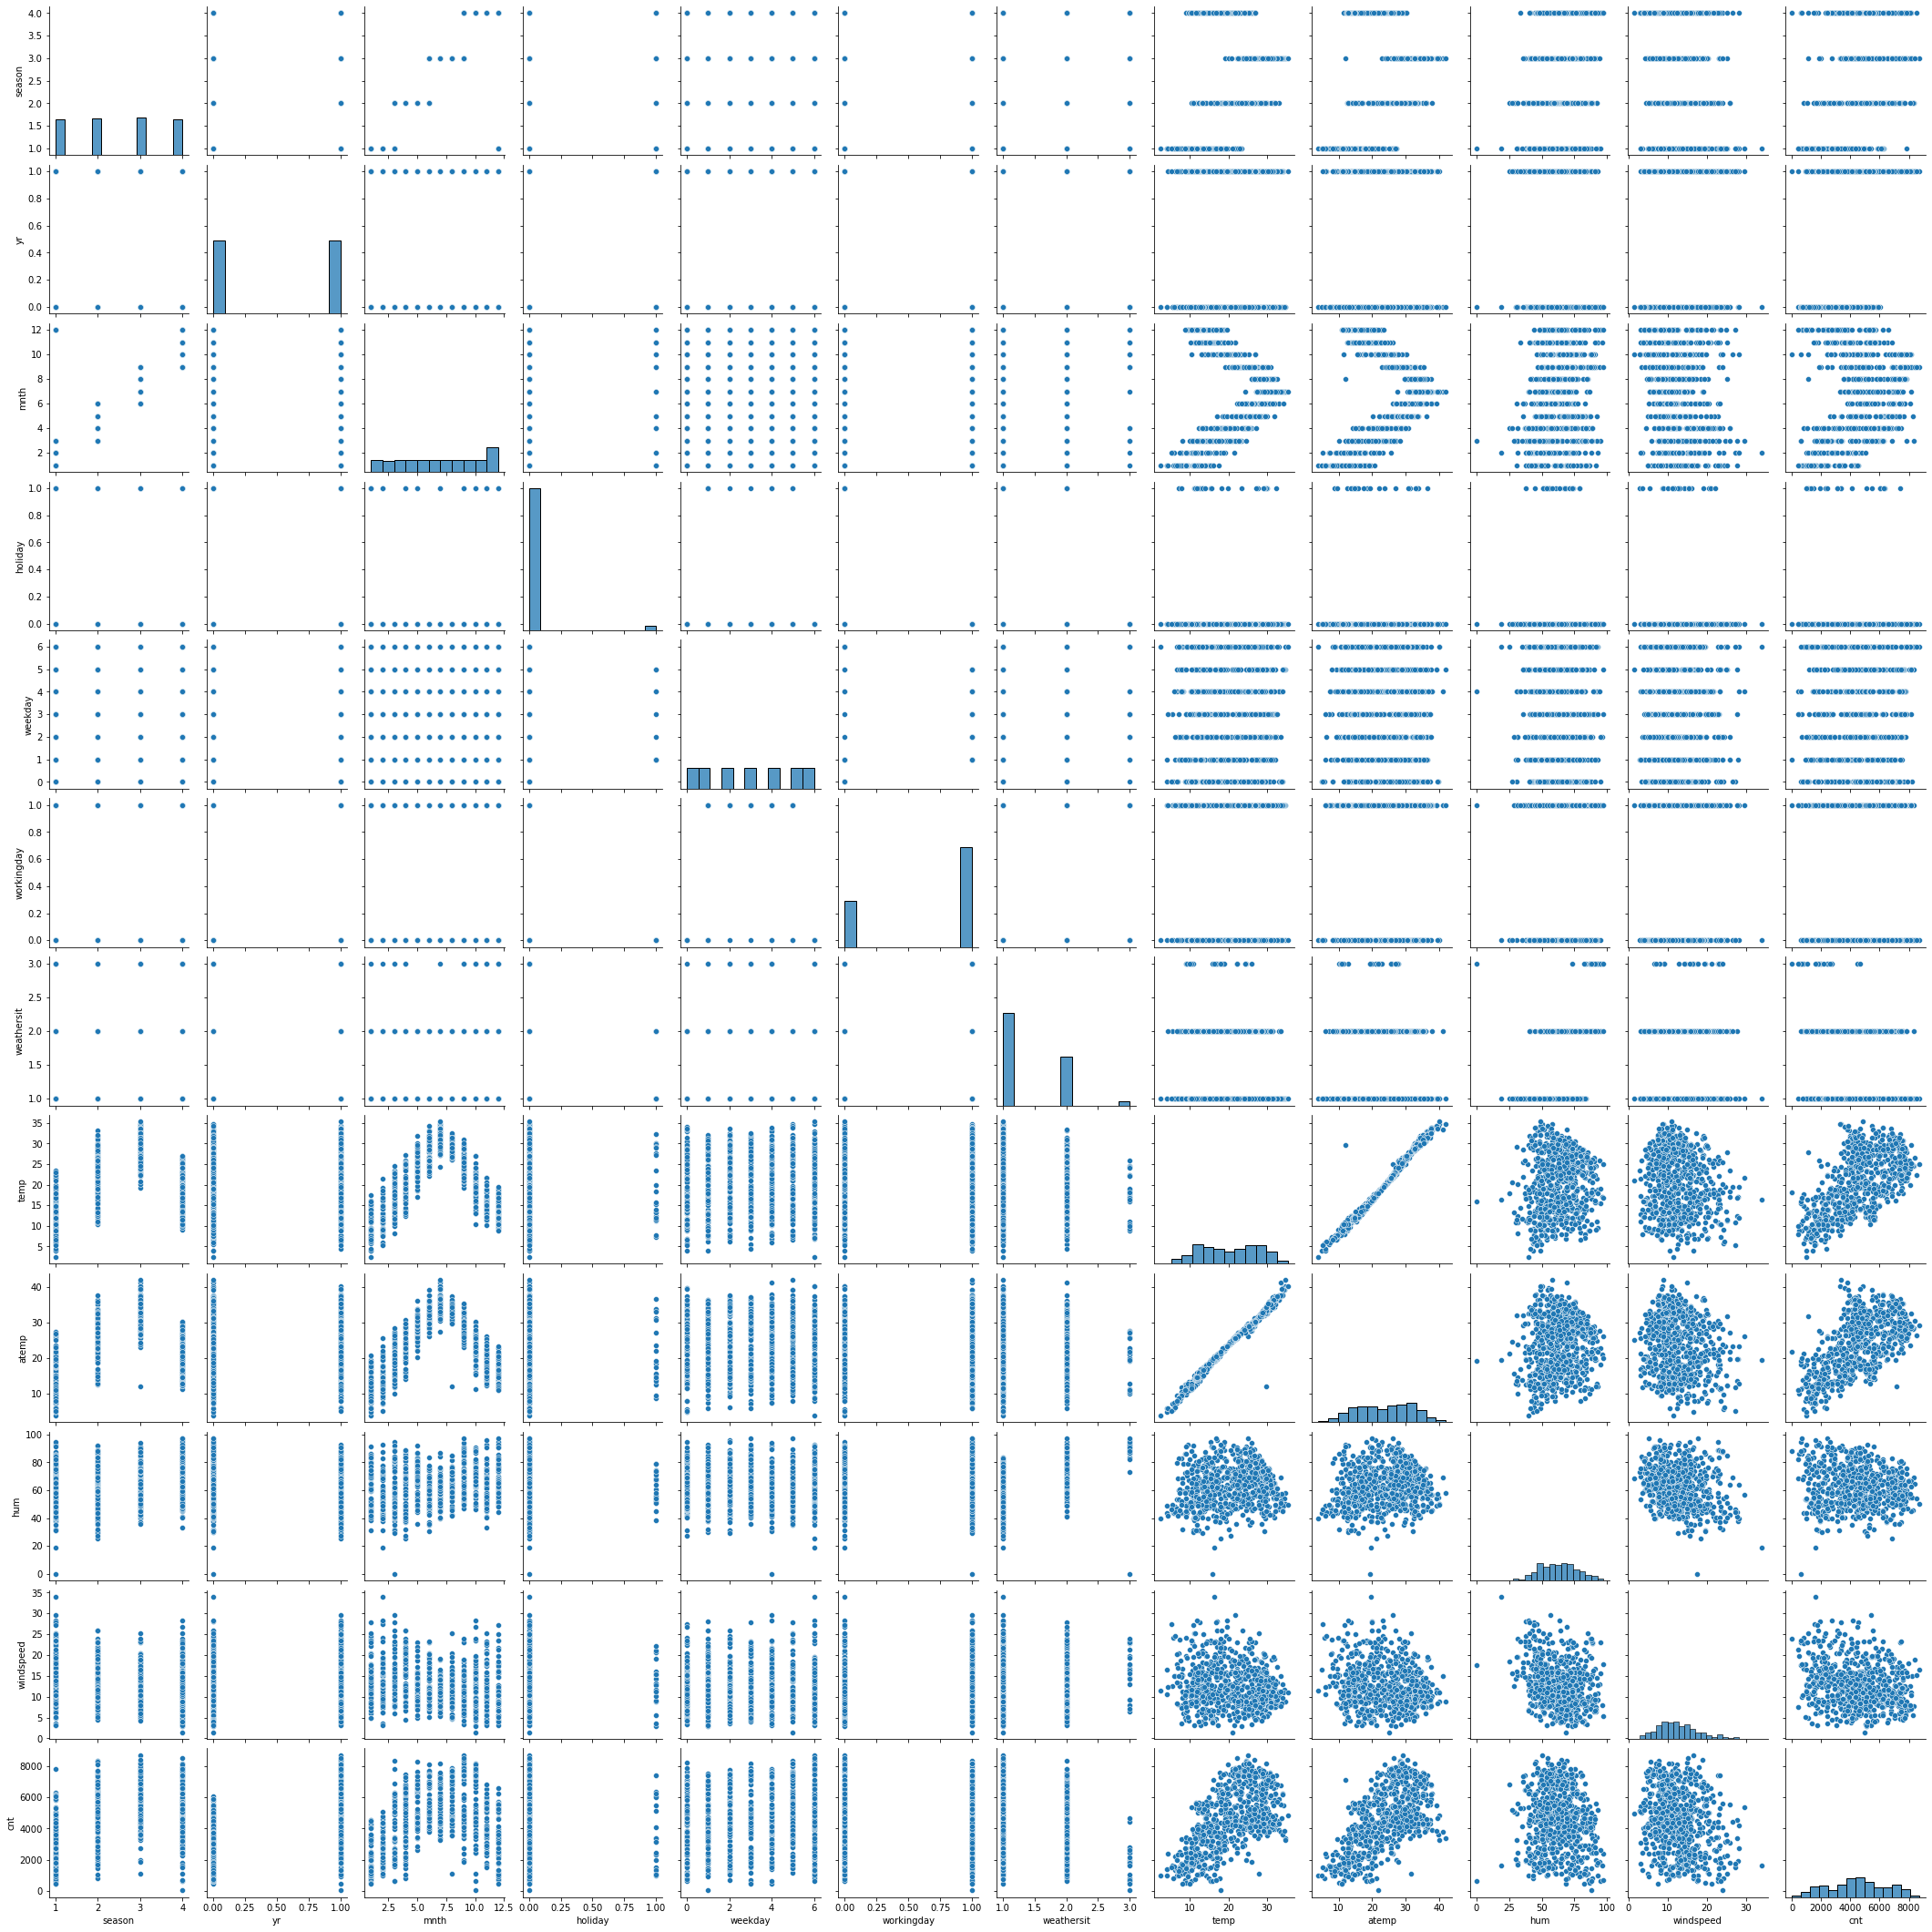

In [13]:
sns.pairplot(bike_sharing)
plt.show()

#### HeatMap of Correlation Matrix of DataFrame

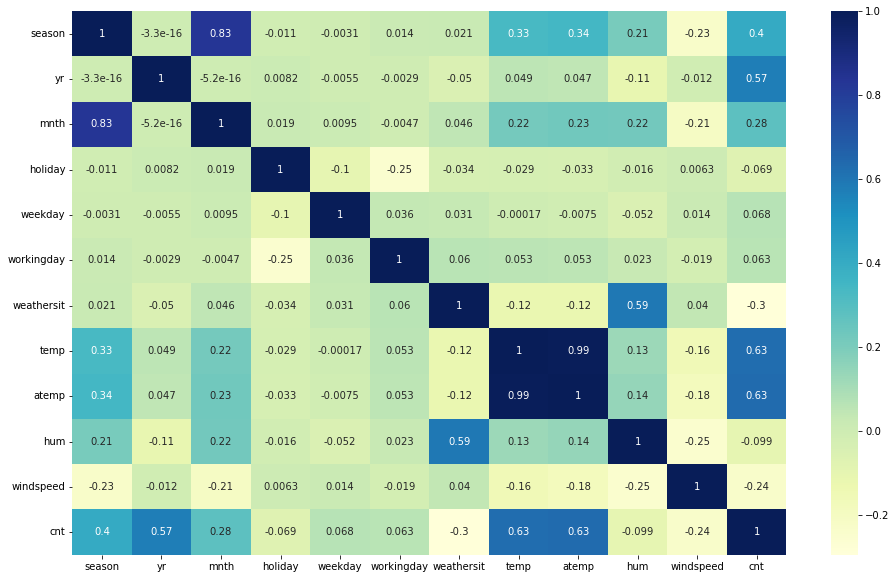

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations:

- The Pair - Plot of <b>'temp' and 'atemp'</b> independant variables form a Linear Graph which shows both variables display Multi-Collinearity.
- The HeatMap for the DataFrame stated above shows <b>'temp' and 'atemp'</b> variables are Highly Correlated with value 0.99.
- Therefore, we need to drop any among <b>'temp' and 'atemp'</b> variables to obtain finer model.
- The <b>'mnth' and 'season'</b> variables are correlated to a value 0.83 which will be investigated further as their Pair - Plot do not display Linear Graphs.

In [15]:
# Dropping 'atemp' column 
bike_sharing.drop(columns='atemp', axis=1, inplace=True)

We have analysed the Numerical Variables above. Lets look at the Categorical Variables as well.

In [16]:
# Setting Frame Color to Gold for the Graphs
frame_color = '#FFD700'

# Mapping the Categorical Variables with meaningful names to construct Graphs 
bike_sharing.yr = bike_sharing.yr.map({0:2018, 1:2019})
bike_sharing.holiday = bike_sharing.holiday.map({0:'No', 1:'Yes'})
bike_sharing.workingday = bike_sharing.workingday.map({0:'No', 1:'Yes'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1: 'Clear', 2:'Mist', 3:'lightSnow', 4:'heavyRain'})
bike_sharing.season = bike_sharing.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bike_sharing.mnth = bike_sharing.mnth.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

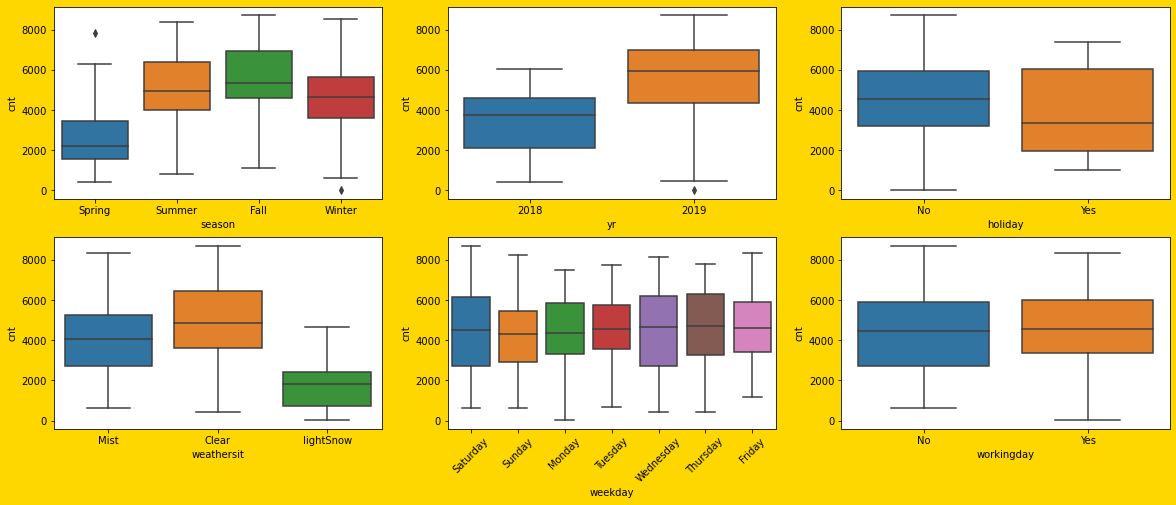

In [17]:
# Creation of 7 Sub Plots displaying the box plot of each categorical variable.
plt.figure(figsize=(20, 12)).set_facecolor(frame_color)
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.xticks(rotation=45) # Rotate X Ticks to 45 Degree to prevent overlapping each other
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.show()

#### Observations:
- The number of users are most during <b>Fall</b> Season and less during <b>Spring</b> Season as people tend to carry out most of their activities during Fall.
- The number of users are more in the year 2019 than in the year 2018 as people take time to understand the service.
- The commute of people is usually less during Holidays and therefore the mean number of users is less during <b>Holidays</b> when compared to <b>Non-Holidays</b>.
- The use of Bike Sharing system is more during <b>Clear Weather</b> and the use decreases as weather situations worsen.
- The demand for the system use is almost same on all weekdays.

<hr>

#### Box Plot Of Bike Sharing System users in different Season against Year

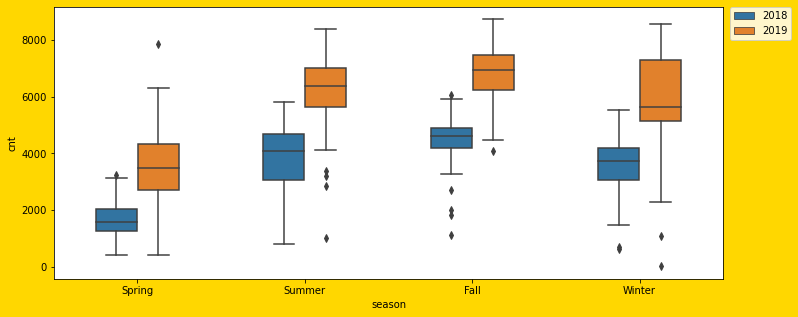

In [18]:
plt.figure(figsize = (12, 5)).set_facecolor(frame_color)
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bike_sharing, width=0.5)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)
plt.show()

#### Observations
- The average total number of users are more during Fall Season irrespective of the year 2018 and 2019.

<hr>

#### Box Plot Of Bike Sharing System users in different Season against Working Day

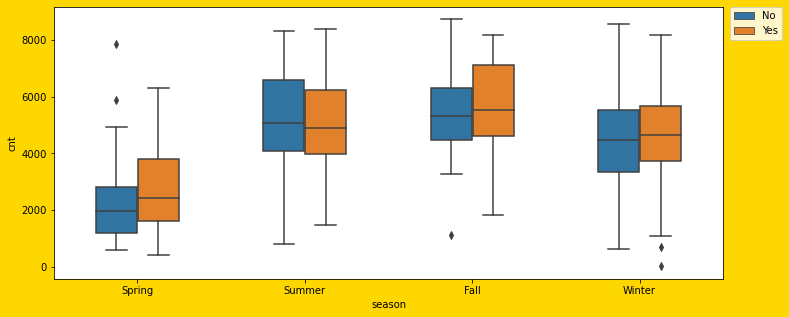

In [19]:
plt.figure(figsize = (12, 5)).set_facecolor(frame_color)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike_sharing, width=0.5)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)
plt.show()

#### Observations
- The average total number of users are more on a Working Day during Fall Season due to maximum people commute during Fall Season.
- The average total number of users are less on a Non-Working Day during Spring Season may be due to less movement of people because of </br>Holidays or anything which should be investigated further.

<hr>

#### Box Plot Of Bike Sharing System users in different Months against Working Day

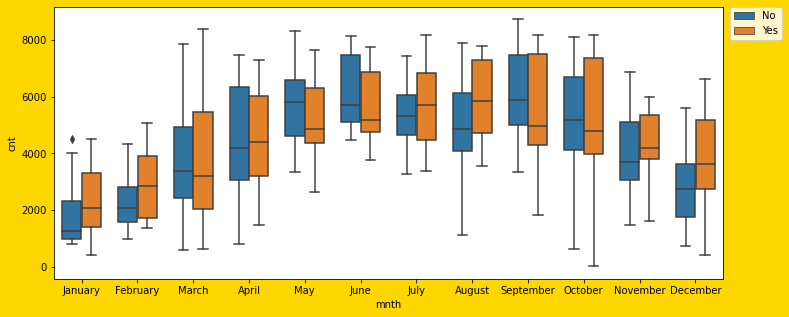

In [20]:
plt.figure(figsize = (12, 5)).set_facecolor(frame_color)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = bike_sharing, width=0.7)
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)
plt.show()

#### Observations
- The average demand increased from March to October and the pattern is same for both Working and Non-Working Days.

<hr>

## Step 3: Data Preparation

- The Categorical Values should be converted to Sequential Numerical Values to fit a Regression Line

In [21]:
# Conversion Of Categorical Variables into Sequential Numerical Variables.
bike_sharing.yr = bike_sharing.yr.map({2018:0, 2019:1})
bike_sharing.holiday = bike_sharing.holiday.map({'No':0, 'Yes':1})
bike_sharing.workingday = bike_sharing.workingday.map({'No':0, 'Yes':1})
bike_sharing.weekday = bike_sharing.weekday.map({'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6})
bike_sharing.mnth = bike_sharing.mnth.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})


In [22]:
# Display of Data Frame
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


<hr>

#### Creation of Dummy Variables

- The variable <b>'season'</b> and <b>'weathersit'</b> has 4 and 3 categorical levels respectively.
- To convert them to integer values, we create Dummy Variables out of them.

In [23]:
# Get Dummy Variable for feature 'season' and store it in a new variable 'seasons'
seasons = pd.get_dummies(bike_sharing.season)
seasons.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. Drop the `Fall` column, as the type of 'season' can be identified with just the last three columns where — 
- `100` will correspond to `Spring`
- `001` will correspond to `Winter`
- `010` will correspond to `Summer`
- `000` will correspond to `Fall`

In [24]:
# Create Dummy Variable Data Frame and Drop the First Dummy Column
seasons = pd.get_dummies(bike_sharing.season, drop_first=True)

# Concat Dummy Variable Data Frame to Original Data Frame.
bike_sharing = pd.concat([bike_sharing, seasons], axis = 1)

In [25]:
# Get Dummy Variable for feature 'weathersit' and store it in a new variable 'weatherSituation'
weatherSituation = pd.get_dummies(bike_sharing.weathersit,)
weatherSituation.head()

,Clear,Mist,lightSnow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. Drop the `Clear` column, as the type of 'weathersit' can be identified with just the last two columns where — 
- `01` will correspond to `Mist`
- `10` will correspond to `Light Snow`
- `00` will correspond to `Clear`

In [26]:
# Create Dummy Variable Data Frame and Drop the First Dummy Column
weatherSituation = pd.get_dummies(bike_sharing.weathersit, drop_first=True)

# Concat Dummy Variable Data Frame to Original Data Frame.
bike_sharing = pd.concat([bike_sharing, weatherSituation], axis = 1)

In [27]:
# Data Frame before dropping of Parent Variables of Dummy Variables.
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,lightSnow
0,Spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,Spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,Spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,Spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [28]:
# Dropping Parent Categorical Variables of Dummy Variables.
bike_sharing.drop(['season'], axis = 1, inplace = True)
bike_sharing.drop(['weathersit'], axis = 1, inplace = True)

In [29]:
# Data Frame after dropping Parent Variables of Dummy Variables.
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,lightSnow
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


<hr>

## Step 4: Building Model

#### Splitting the Data into Training and Testing Sets

In [30]:
# Importing train_test_split 
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively, % of train data = 70,
# % of test data = 30;
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

Rescaling of Variables is performed to obtain comparable co-efficients of independent variables </br>which also enhances model evaluation.
We shall use Min-Max Scaling here.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,lightSnow
653,1,0.818182,0,0.333333,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0


In [34]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,lightSnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Observations:
- The Maximum and Minimum values of all the variables are `1` and `0` respectively after Scaling.

#### Dividing Variables into X and Y sets

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building Model using Recursive Feature Elimination

To ease the feature elimination from a Data Frame having large number of Variables, we shall follow the process of RFE</br>
which is followed by manual elimination based on requirement

In [36]:
# Import RFE and Linear Regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mist', True, 1),
 ('lightSnow', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Mist', 'lightSnow'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['mnth'], dtype='object')

In [39]:
# Creating Training data after feature elimination using RFE
X_train_rfe = X_train[col]

#### Building Model using StatsModel api for Statstical Details Extraction

In [40]:
# Import StatsModels api
import statsmodels.api as sm  

# Adding Constant Variable
X_train_new = sm.add_constant(X_train_rfe)

X_train_new.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Mist,lightSnow
653,1.0,1,0,0.333333,1,0.509887,0.575354,0.300794,0,0,1,0,0
576,1.0,1,0,0.333333,1,0.815169,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,1.000000,0,0.442393,0.640189,0.255342,1,0,0,1,0
728,1.0,1,0,0.000000,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,1.000000,0,0.395666,0.504508,0.188475,0,1,0,1,0


In [41]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          1.00e-184
Time:                        08:33:54   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2459      0.037      6.718      0.0

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,79.48
8,Spring,4.54
5,temp,3.50
10,Winter,3.11
9,Summer,2.06
6,hum,1.89
11,Mist,1.58
12,lightSnow,1.25
7,windspeed,1.20
2,holiday,1.08


- The R-Squared and Adjusted R - Squared Values are above `80%`.
- The P-Values of all the variables are less than `0.05`.
- The VIF values of all variables are less than `5`.
- Therefore, the above variables can be accepted in building the Linear Regression Model.

In [43]:
y_train_new = lm.predict(X_train_new)

#### Residual Analysis on Trained Data


Text(0.5, 0, 'Errors')

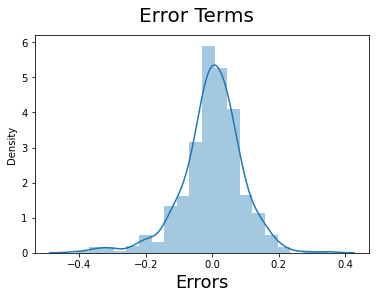

In [44]:
## Importing Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_new), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

#### Observations:
- A Histogram for Residuals of the train data is plotted and a Normal Distribution having `Mean` at `0` is obtained</br>
which shows the error terms of the trained data are Normally Distributed.

<hr>

#### Model Evaluation

Text(0, 0.5, 'y_train-y_train_new')

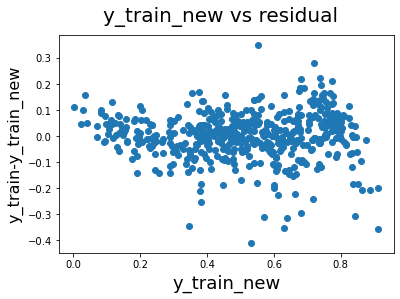

In [45]:
# Scatter Plot of Y_train_new (Model Predicted) vs Residuals (y_train-y_train_new) of trained Data
fig = plt.figure()
plt.scatter(y_train_new,y_train-y_train_new)
fig.suptitle('y_train_new vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_new', fontsize=18)                          # X-label
plt.ylabel('y_train-y_train_new', fontsize=16)   

#### Observation

- The above plot shows Independance of Error Terms and fullfillment of HomoScedascity as there are no patterns in the plot.

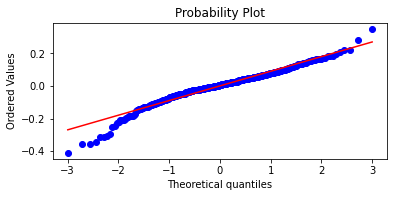

In [46]:
## Q-Q Plot of Residuals of Trained Data
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(y_train-y_train_new, plot=ax, fit=True)

#### Observation

- The overall fit of plot shows a straight line which also implies that error terms are normally distributed.

<hr>

## Step 4: Making Predictions

#### Scaling the Test Set
- We perform only transformation on Test Data but not fitting as the Statistical parameters of Train data are not related to Test data.

In [47]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Mist,lightSnow
184,1.0,0,1,0.166667,0,0.831783,0.657364,0.084219,0,0,0,1,0
535,1.0,1,0,0.500000,1,0.901354,0.610133,0.153728,0,1,0,0,0
299,1.0,0,0,0.666667,1,0.511964,0.837699,0.334206,0,0,1,1,0
221,1.0,0,0,0.500000,1,0.881625,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,0.666667,1,0.817246,0.314298,0.537414,0,1,0,0,0


In [50]:
y_pred = lm.predict(X_test_new)

#### Residual Analysis on Test Data


Text(0.5, 0, 'Errors')

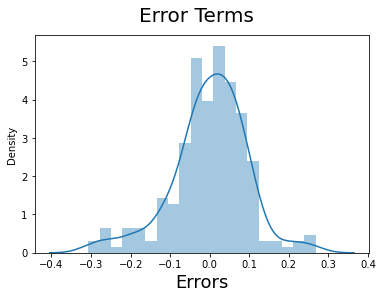

In [51]:
## Importing Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Observations:
- A Histogram for Residuals of the test data is plotted and a Normal Distribution having `Mean` at `0` is obtained</br>
which shows the error terms of the trained data are Normally Distributed.

#### Model Evaluation

Text(0, 0.5, 'y_test-y_pred')

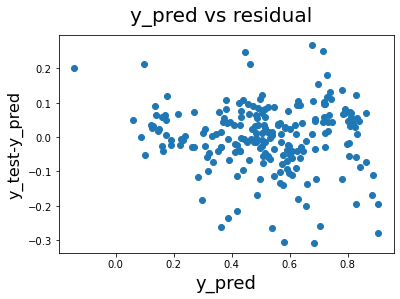

In [52]:
# Scatter Plot of Y_pred (Model Predicted) vs Residuals (y_test-y_pred) of Test Data
fig = plt.figure()
plt.scatter(y_pred,y_test-y_pred)
fig.suptitle('y_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('y_test-y_pred', fontsize=16)      

#### Observation

- The above plot shows Independance of Error Terms and fullfillment of HomoScedascity as there are no patterns in the plot

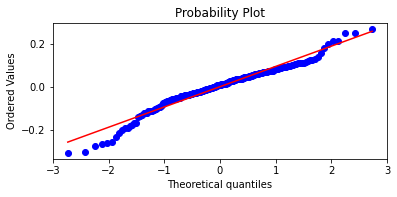

In [53]:
## Q-Q Plot of Residuals of Trained Data
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(y_test-y_pred, plot=ax, fit=True)

#### Observation

- The overall fit of plot shows a straight line which also implies that error terms are normally distributed.

## Conclusions:

- Based on the performed Linear Regression Model, the co-efficients of various Independent variables obtained are:

In [54]:
print(lm.params.round(3).sort_values())

lightSnow    -0.249
windspeed    -0.180
hum          -0.123
Spring       -0.074
holiday      -0.064
Mist         -0.059
workingday    0.019
Summer        0.043
weekday       0.049
Winter        0.090
yr            0.232
const         0.246
temp          0.493
dtype: float64


- The Equation produced by Linear-regression model to predict the total number of users is as:

### TotalUsers = 0.246 - 0.249 * lightSnow - 0.180 * windspeed - 0.123 * hum - 0.074 * Spring - 0.064 * holiday - 0.059 * Mist + 0.019 * workingday + 0.043 * Summer + 0.049 * weekday + 0.090 * Winter + 0.232 * yr +  0.493 * temp          

- The User Demand for the Bike Sharing Service is positively affected by `workingday, weekday, summer, winter and temp` variables.`
- The User Demand for the Bike Sharing Service is negatively affected by `lightSnow, windspeed, Spring, holiday and Mist` variables.
- The model cannot be expressed as exact model and it can also be improved.